In [2]:
# loading the dataset from tensorflow directly
import tensorflow as tf

fashion_mnist_dataset = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_dataset.load_data()

2024-11-03 16:26:58.463769: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-03 16:26:58.471119: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-03 16:26:58.541182: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-03 16:26:58.603605: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730647618.663632     524 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730647618.68

In [3]:
# class names are not included in the dataset's labels, so we include them here to make plotting in the future easier
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

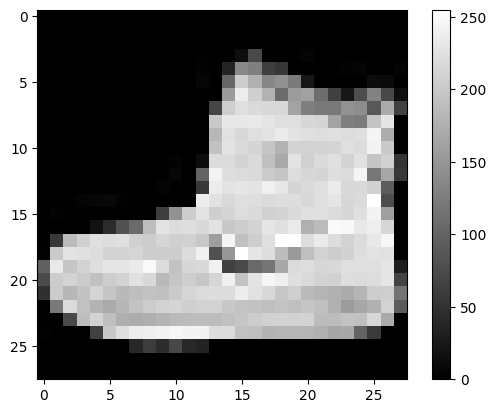

In [4]:
# printing one of the images, to verify that we loaded the dataset correctly
from matplotlib import pyplot as plt 
clothing_item = train_images[0]
plt.figure()
plt.imshow(clothing_item, cmap="gray")
plt.colorbar()
plt.show()

In [5]:
# normalizing pixel data to be in the range from 0-1 in order to improve training later on
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# reshape images to specify grayscale instead of multiple color channels
train_images= train_images.reshape((train_images.shape[0]), 28, 28, 1)
test_images = test_images.reshape((test_images.shape[0]), 28, 28, 1)

In [28]:
# creating models for classifying the data and compiling it
from tensorflow.keras import models, layers, optimizers
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Some of this code is generated by chatGPT, in particular the code for generating a confusion matrix

def train_model(layers):
    model = tf.keras.Sequential([tf.keras.layers.Input(shape=(28,28)), tf.keras.layers.Flatten()])
    for neurons in layers:
        add_layer = tf.keras.layers.Dense(neurons, activation="relu")
        model.add(add_layer)
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    
    model.compile(optimizer="adam",
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                   metrics=["accuracy"])
    model.fit(train_images, train_labels, epochs=10)
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f"Test accuracy: {test_acc}")

    # CHATGPT GENERATED CODE 

    # Step 1: Make Predictions
    # Predict the classes for the test images
    predictions = model.predict(test_images)  # Assuming test_images is your test data
    predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

    # Step 2: Generate Confusion Matrix
    # `clothing_labels` should be the true labels for your test dataset
    # Generate confusion matrix
    cm = confusion_matrix(test_labels, predicted_classes)

    # Step 3: Visualize the Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7755 - loss: 0.6457
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8612 - loss: 0.3738
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8716 - loss: 0.3393
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8835 - loss: 0.3116
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8888 - loss: 0.2940
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8957 - loss: 0.2788
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9020 - loss: 0.2621
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9020 - loss: 0.2553
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9089 - loss: 0.2402
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9091 - loss: 0.2353
313/313 - 0s - 983us/step - accuracy: 0.8803 - loss: 0.3435
Test accuracy: 0.880299985408783
313/313 ━━━━━━━━━━━━━━━━━━

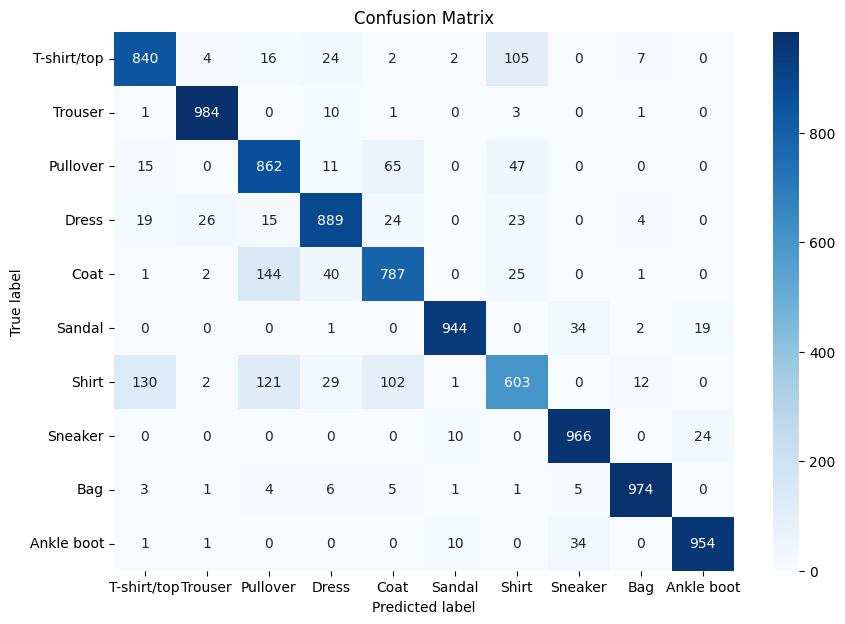

In [17]:
train_model([64, 256])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7650 - loss: 0.6594
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8592 - loss: 0.3818
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8712 - loss: 0.3462
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8795 - loss: 0.3257
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8887 - loss: 0.2960
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8926 - loss: 0.2872
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8963 - loss: 0.2779
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9004 - loss: 0.2651
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9029 - loss: 0.2535
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9067 - loss: 0.2459
313/313 - 0s - 1ms/step - accuracy: 0.8813 - loss: 0.3289
Test accuracy: 0.8812999725341797
313/313 ━━━━━━━━━━━━━━━━━━━

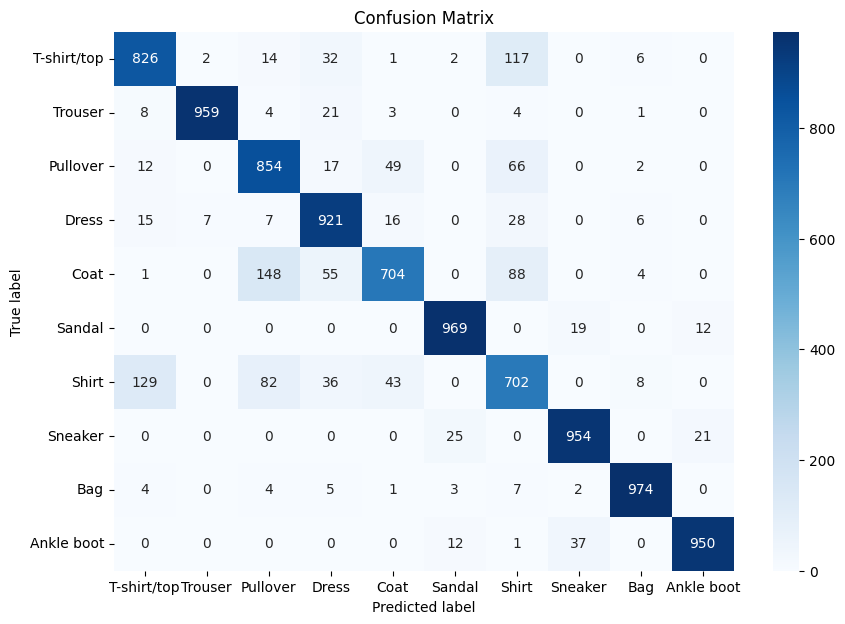

In [18]:
train_model([64,64,256])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7791 - loss: 0.6127
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8595 - loss: 0.3767
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8783 - loss: 0.3323
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8867 - loss: 0.3078
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8938 - loss: 0.2839
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8969 - loss: 0.2776
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9047 - loss: 0.2566
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9049 - loss: 0.2515
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9069 - loss: 0.2463
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9123 - loss: 0.2335
313/313 - 0s - 1ms/step - accuracy: 0.8846 - loss: 0.3382
Test accuracy: 0.8845999836921692
313/313 ━━━━━━━━━━━━━━━━━━━

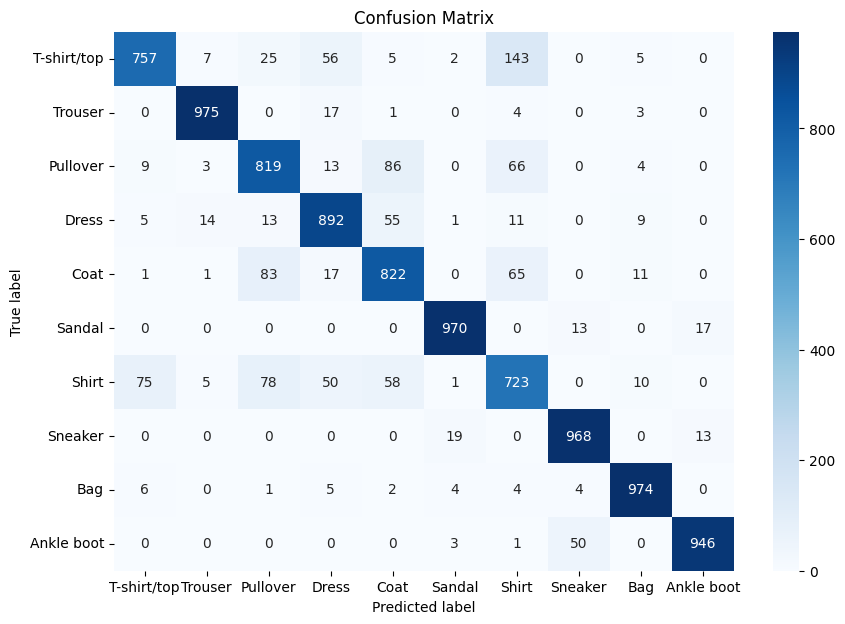

In [19]:
train_model([256, 64, 512])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7785 - loss: 0.6105
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8634 - loss: 0.3738
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8797 - loss: 0.3255
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8907 - loss: 0.2982
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8942 - loss: 0.2834
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8985 - loss: 0.2660
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9045 - loss: 0.2528
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9095 - loss: 0.2390
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9112 - loss: 0.2331
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9147 - loss: 0.2236
313/313 - 0s - 1ms/step - accuracy: 0.8801 - loss: 0.3499
Test accuracy: 0.8801000118255615
313/313 ━━━━━━━━━━━━━━━━━━━

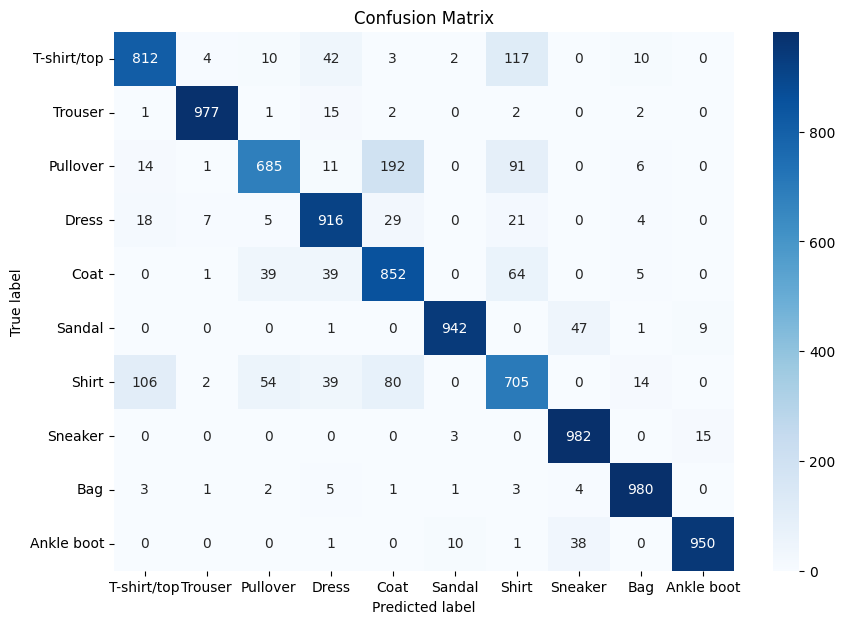

In [20]:
train_model([128, 256])

/home/maxim/.local/share/virtualenvs/ML-As3617Tb/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7670 - loss: 0.6455 - val_accuracy: 0.8759 - val_loss: 0.3462
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8916 - loss: 0.3038 - val_accuracy: 0.8870 - val_loss: 0.3088
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9068 - loss: 0.2523 - val_accuracy: 0.9058 - val_loss: 0.2565
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9216 - loss: 0.2112 - val_accuracy: 0.9096 - val_loss: 0.2548
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9318 - loss: 0.1850 - val_accuracy: 0.9125 - val_loss: 0.2426
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9431 - loss: 0.1563 - val_accuracy: 0.9028 - val_loss: 0.2712
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9486 - loss: 0.1372 - val_accuracy: 0.9202 - val_loss: 0.2358
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9552 - loss: 0

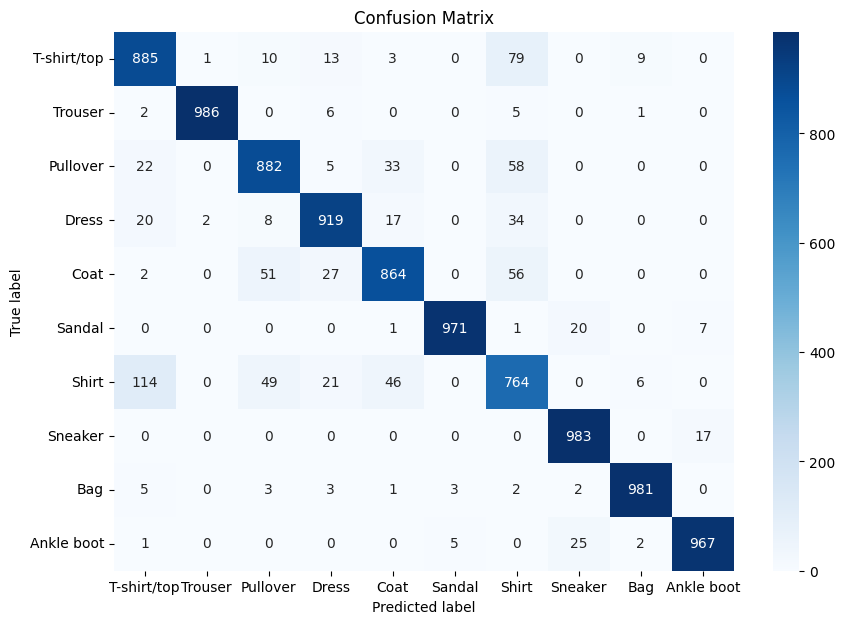

In [37]:
# experimenting with other kinds of models 256, 64, 512

from tensorflow.keras.callbacks import EarlyStopping

new_model = models.Sequential()
new_model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
#new_model.add(layers.BatchNormalization())
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(layers.Conv2D(64, (3, 3), activation="relu"))
#new_model.add(layers.BatchNormalization())
#new_model.add(layers.MaxPooling2D((2, 2)))
#new_model.add(layers.MaxPooling2D((2, 2)))
#new_model.add(layers.Conv2D(32, (3, 3), activation="relu"))

new_model.add(layers.Flatten())
new_model.add(layers.Dense(32, activation="relu"))
#new_model.add(layers.Dropout(0.5))
new_model.add(layers.Dense(64, activation="relu"))
new_model.add(layers.Dense(10, activation="softmax"))

new_model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                   metrics=["accuracy"])

early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

new_model.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels), callbacks=[early_stopping])
test_loss, test_acc = new_model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")



predictions = new_model.predict(test_images)  # Assuming test_images is your test data
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

    # Step 2: Generate Confusion Matrix
    # `clothing_labels` should be the true labels for your test dataset
    # Generate confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)

    # Step 3: Visualize the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()